In [119]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

In [90]:
pesticides=pd.read_csv('../data/pesticides.csv')
rainfall=pd.read_csv('../data/rainfall.csv')
temp=pd.read_csv('../data/temp.csv')
yld=pd.read_csv('../data/yield.csv')

In [5]:
rainfall.rename(columns={'average_rain_fall_mm_per_year':'avg_rain'},inplace=True)
rainfall.head()

Area  Year avg_rain
0  Afghanistan  1985      327
1  Afghanistan  1986      327
2  Afghanistan  1987      327
3  Afghanistan  1989      327
4  Afghanistan  1990      327

In [6]:
temp.rename(columns={'avg_temp':'temp'},inplace=True)
temp.head()

year        country   temp
0  1849  Côte D'Ivoire  25.58
1  1850  Côte D'Ivoire  25.52
2  1851  Côte D'Ivoire  25.67
3  1852  Côte D'Ivoire    NaN
4  1853  Côte D'Ivoire    NaN

In [7]:

temp.rename(columns={'year':'Year','country':'Area'},inplace=True)
temp.head()


Year           Area   temp
0  1849  Côte D'Ivoire  25.58
1  1850  Côte D'Ivoire  25.52
2  1851  Côte D'Ivoire  25.67
3  1852  Côte D'Ivoire    NaN
4  1853  Côte D'Ivoire    NaN

In [8]:
temp1=temp.drop(['temp'],axis=1)
temp1=temp1.drop_duplicates(keep='first')
temp1.shape

(28514, 2)

In [9]:
temp2=temp.groupby(['Year', 'Area'])['temp'].mean()


In [10]:
temp2 = temp2.reset_index(level=[0, 1], drop=True)
temp2 = temp2.rename('avg_temp')

In [13]:
temp2
temp3=temp1.join(temp2, how='left')
temp=temp3
temp

Year           Area  avg_temp
0      1849  Côte D'Ivoire     12.69
1      1850  Côte D'Ivoire      4.11
2      1851  Côte D'Ivoire      0.23
3      1852  Côte D'Ivoire      7.52
4      1853  Côte D'Ivoire      4.98
...     ...            ...       ...
71130  2009        Croatia       NaN
71131  2010        Croatia       NaN
71132  2011        Croatia       NaN
71133  2012        Croatia       NaN
71134  2013        Croatia       NaN

[28514 rows x 3 columns]

In [17]:
rainfall=rainfall.rename(columns={' Area':'Area'})

In [19]:
pesticides

Domain      Area Element                Item  Year   
0     Pesticides Use   Albania     Use  Pesticides (total)  1990  \
1     Pesticides Use   Albania     Use  Pesticides (total)  1991   
2     Pesticides Use   Albania     Use  Pesticides (total)  1992   
3     Pesticides Use   Albania     Use  Pesticides (total)  1993   
4     Pesticides Use   Albania     Use  Pesticides (total)  1994   
...              ...       ...     ...                 ...   ...   
4344  Pesticides Use  Zimbabwe     Use  Pesticides (total)  2012   
4345  Pesticides Use  Zimbabwe     Use  Pesticides (total)  2013   
4346  Pesticides Use  Zimbabwe     Use  Pesticides (total)  2014   
4347  Pesticides Use  Zimbabwe     Use  Pesticides (total)  2015   
4348  Pesticides Use  Zimbabwe     Use  Pesticides (total)  2016   

                              Unit    Value  
0     tonnes of active ingredients   121.00  
1     tonnes of active ingredients   121.00  
2     tonnes of active ingredients   121.00  
3     tonnes of active ingredients   121.00  
4     tonnes of active ingredients   201.00  
...                            ...      ...  
4344  tonnes of active ingredients  3375.53  
4345  tonnes of active ingredients  2550.07  
4346  tonnes of active ingredients  2185.07  
4347  tonnes of active ingredients  2185.07  
4348  tonnes of active ingredients  2185.07  

[4349 rows x 7 columns]

In [20]:
temp_tbl_1=pd.merge(yld,pesticides,how='left',left_on=['Area','Year'], right_on=['Area','Year'])
temp_tbl_2=pd.merge(temp_tbl_1,rainfall, how='left', left_on=['Area','Year'], right_on=['Area','Year'])
temp_tbl_3=pd.merge(temp_tbl_2,temp,how='left', left_on=['Area','Year'], right_on=['Area','Year'])
temp_tbl_3.describe()


Area Code  Element Code     Item Code     Year Code          Year   
count  56717.000000       56717.0  56717.000000  56717.000000  56717.000000  \
mean     125.650422        5419.0    111.611651   1989.669570   1989.669570   
std       75.120195           0.0    101.278435     16.133198     16.133198   
min        1.000000        5419.0     15.000000   1961.000000   1961.000000   
25%       58.000000        5419.0     56.000000   1976.000000   1976.000000   
50%      122.000000        5419.0    116.000000   1991.000000   1991.000000   
75%      184.000000        5419.0    125.000000   2004.000000   2004.000000   
max      351.000000        5419.0    489.000000   2016.000000   2016.000000   

              Value_x       Value_y      avg_temp  
count    56717.000000  2.415300e+04  16084.000000  
mean     62094.660084  2.677197e+04     15.429944  
std      67835.932856  1.401406e+05      7.957172  
min          0.000000  0.000000e+00     -5.520000  
25%      15680.000000  1.310000e+02      8.600000  
50%      36744.000000  1.594500e+03     15.010000  
75%      86213.000000  9.830720e+03     23.900000  
max    1000000.000000  1.807000e+06     30.060000

In [21]:
f_coll_yld=temp_tbl_3[["Area Code","Area","Year","Item Code","Item_x","Unit_y","Value_y","avg_rain","avg_temp","Unit_x","Value_x"]]
raw_data=f_coll_yld[["Area Code","Area","Year","Item Code","Item_x","Value_y","avg_rain","avg_temp","Value_x"]]
raw_data=raw_data.rename(columns={'Area Code':'area_cd','Area':'area','Year':'year','Item Code':'item_cd','Item_x':'crop','Value_y':'pesticide_vol','Value_x':'tot_yield'})

In [74]:
raw_data.loc[(raw_data["area"]=='China') & (raw_data["crop"]=='Cassava')]

area_cd   area  year  item_cd     crop  pesticide_vol avg_rain   
10071      351  China  1961      125  Cassava            NaN      NaN  \
10072      351  China  1962      125  Cassava            NaN      NaN   
10073      351  China  1963      125  Cassava            NaN      NaN   
10074      351  China  1964      125  Cassava            NaN      NaN   
10075      351  China  1965      125  Cassava            NaN      NaN   
10076      351  China  1966      125  Cassava            NaN      NaN   
10077      351  China  1967      125  Cassava            NaN      NaN   
10078      351  China  1968      125  Cassava            NaN      NaN   
10079      351  China  1969      125  Cassava            NaN      NaN   
10080      351  China  1970      125  Cassava            NaN      NaN   
10081      351  China  1971      125  Cassava            NaN      NaN   
10082      351  China  1972      125  Cassava            NaN      NaN   
10083      351  China  1973      125  Cassava            NaN      NaN   
10084      351  China  1974      125  Cassava            NaN      NaN   
10085      351  China  1975      125  Cassava            NaN      NaN   
10086      351  China  1976      125  Cassava            NaN      NaN   
10087      351  China  1977      125  Cassava            NaN      NaN   
10088      351  China  1978      125  Cassava            NaN      NaN   
10089      351  China  1979      125  Cassava            NaN      NaN   
10090      351  China  1980      125  Cassava            NaN      NaN   
10091      351  China  1981      125  Cassava            NaN      NaN   
10092      351  China  1982      125  Cassava            NaN      NaN   
10093      351  China  1983      125  Cassava            NaN      NaN   
10094      351  China  1984      125  Cassava            NaN      NaN   
10095      351  China  1985      125  Cassava            NaN      645   
10096      351  China  1986      125  Cassava            NaN      645   
10097      351  China  1987      125  Cassava            NaN      645   
10098      351  China  1988      125  Cassava            NaN      NaN   
10099      351  China  1989      125  Cassava            NaN      645   
10100      351  China  1990      125  Cassava            NaN      645   
10101      351  China  1991      125  Cassava            NaN      645   
10102      351  China  1992      125  Cassava            NaN      645   
10103      351  China  1993      125  Cassava            NaN      645   
10104      351  China  1994      125  Cassava            NaN      645   
10105      351  China  1995      125  Cassava            NaN      645   
10106      351  China  1996      125  Cassava            NaN      645   
10107      351  China  1997      125  Cassava            NaN      645   
10108      351  China  1998      125  Cassava            NaN      645   
10109      351  China  1999      125  Cassava            NaN      645   
10110      351  China  2000      125  Cassava            NaN      645   
10111      351  China  2001      125  Cassava            NaN      645   
10112      351  China  2002      125  Cassava            NaN      645   
10113      351  China  2003      125  Cassava            NaN      NaN   
10114      351  China  2004      125  Cassava            NaN      645   
10115      351  China  2005      125  Cassava            NaN      645   
10116      351  China  2006      125  Cassava            NaN      645   
10117      351  China  2007      125  Cassava            NaN      645   
10118      351  China  2008      125  Cassava            NaN      645   
10119      351  China  2009      125  Cassava            NaN      645   
10120      351  China  2010      125  Cassava            NaN      645   
10121      351  China  2011      125  Cassava            NaN      645   
10122      351  China  2012      125  Cassava            NaN      645   
10123      351  China  2013      125  Cassava            NaN      645   
10124      351  China  2014      125  Cassava            NaN     

In [23]:
raw_data.shape

(56717, 9)

In [26]:
raw_data_cleaned=raw_data.dropna()
raw_data_cleaned.shape

(6597, 9)

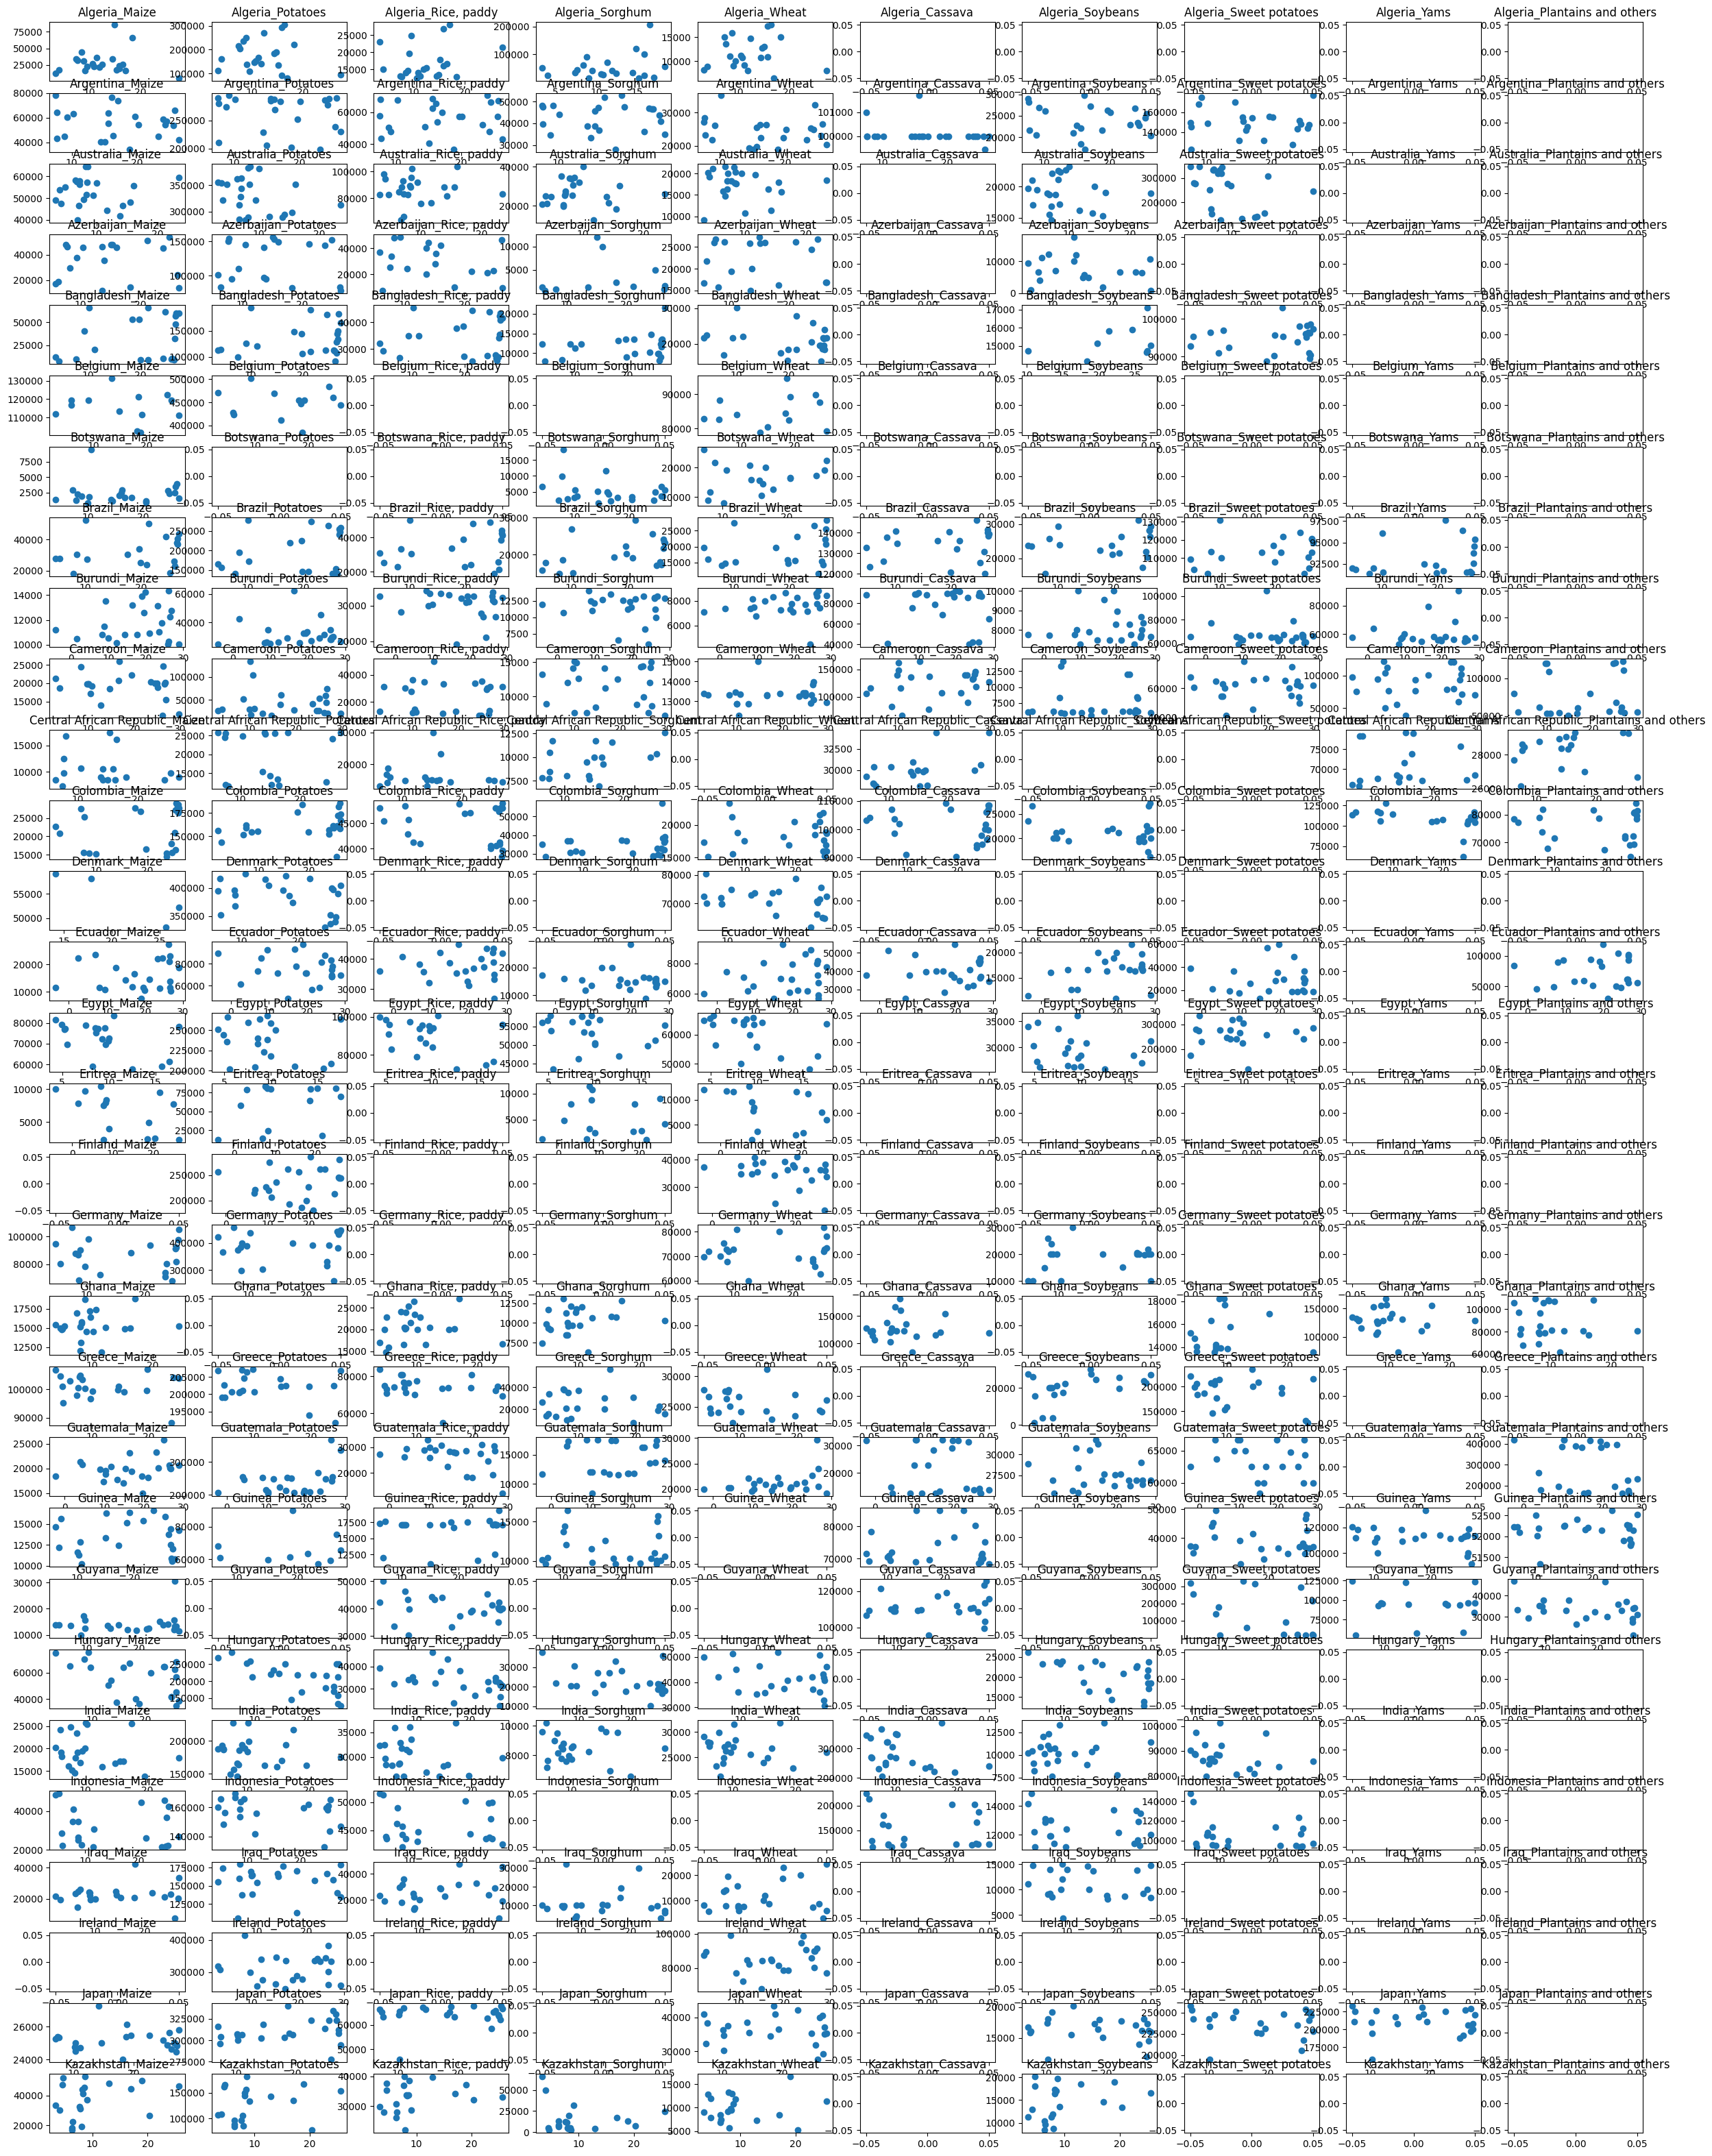

In [63]:
areas=raw_data_cleaned['area'].unique()
crops=raw_data_cleaned['crop'].unique()
fig,ax=plt.subplots(30,10, figsize=(30,40))
i=j=0
for ar in areas:
    j=0
    for cr in crops:
        temp_datacut=raw_data_cleaned.loc[(raw_data_cleaned['area']==ar) & (raw_data_cleaned['crop']==cr)]
        title=ar+'_'+cr
        ax[i,j].scatter(temp_datacut['avg_temp'],temp_datacut['tot_yield'])
        ax[i,j].set_title(title)
        if j==9:
            break
        j+=1
    if i==29:
        break    
    i+=1
    
plt.show()

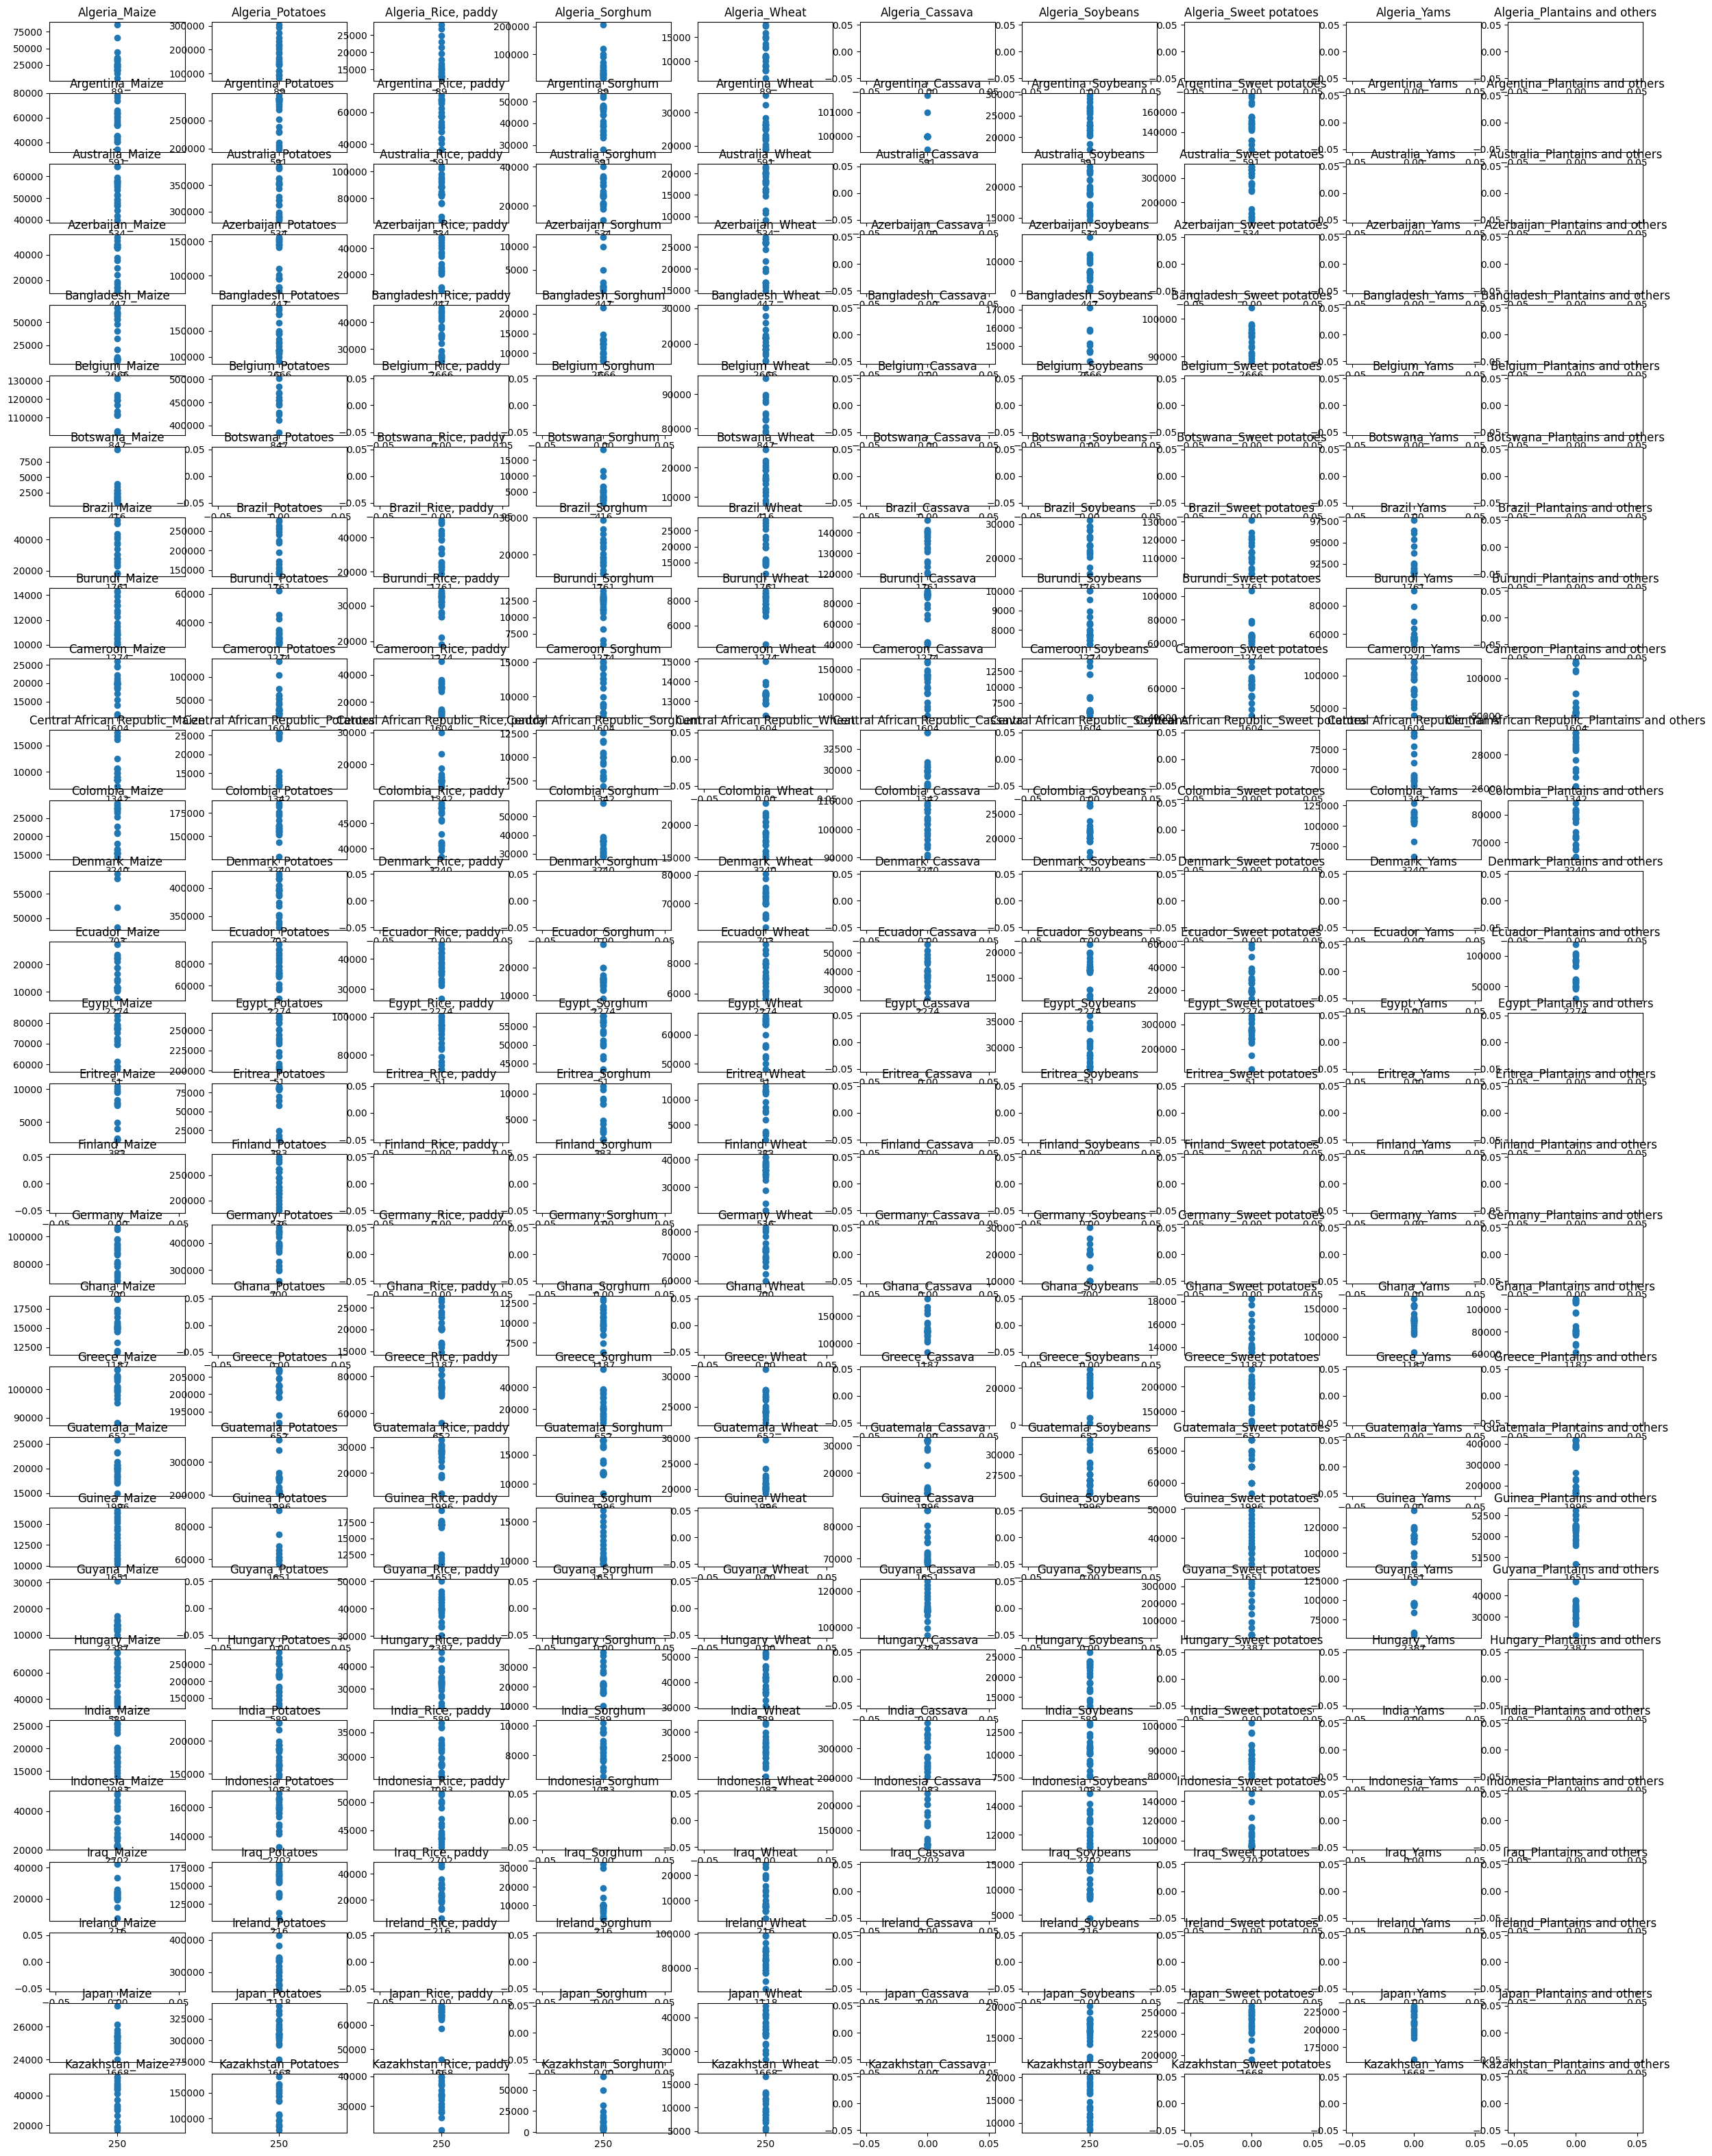

In [66]:
areas=raw_data_cleaned['area'].unique()
crops=raw_data_cleaned['crop'].unique()
fig,ax=plt.subplots(30,10, figsize=(30,40))
i=j=0
for ar in areas:
    j=0
    for cr in crops:
        temp_datacut=raw_data_cleaned.loc[(raw_data_cleaned['area']==ar) & (raw_data_cleaned['crop']==cr)]
        temp_datacut.head
        title=ar+'_'+cr
        ax[i,j].scatter(temp_datacut['avg_rain'],temp_datacut['tot_yield'])
        ax[i,j].set_title(title)
        if j==9:
            break
        j+=1
    if i==29:
        break    
    i+=1
    
plt.show()

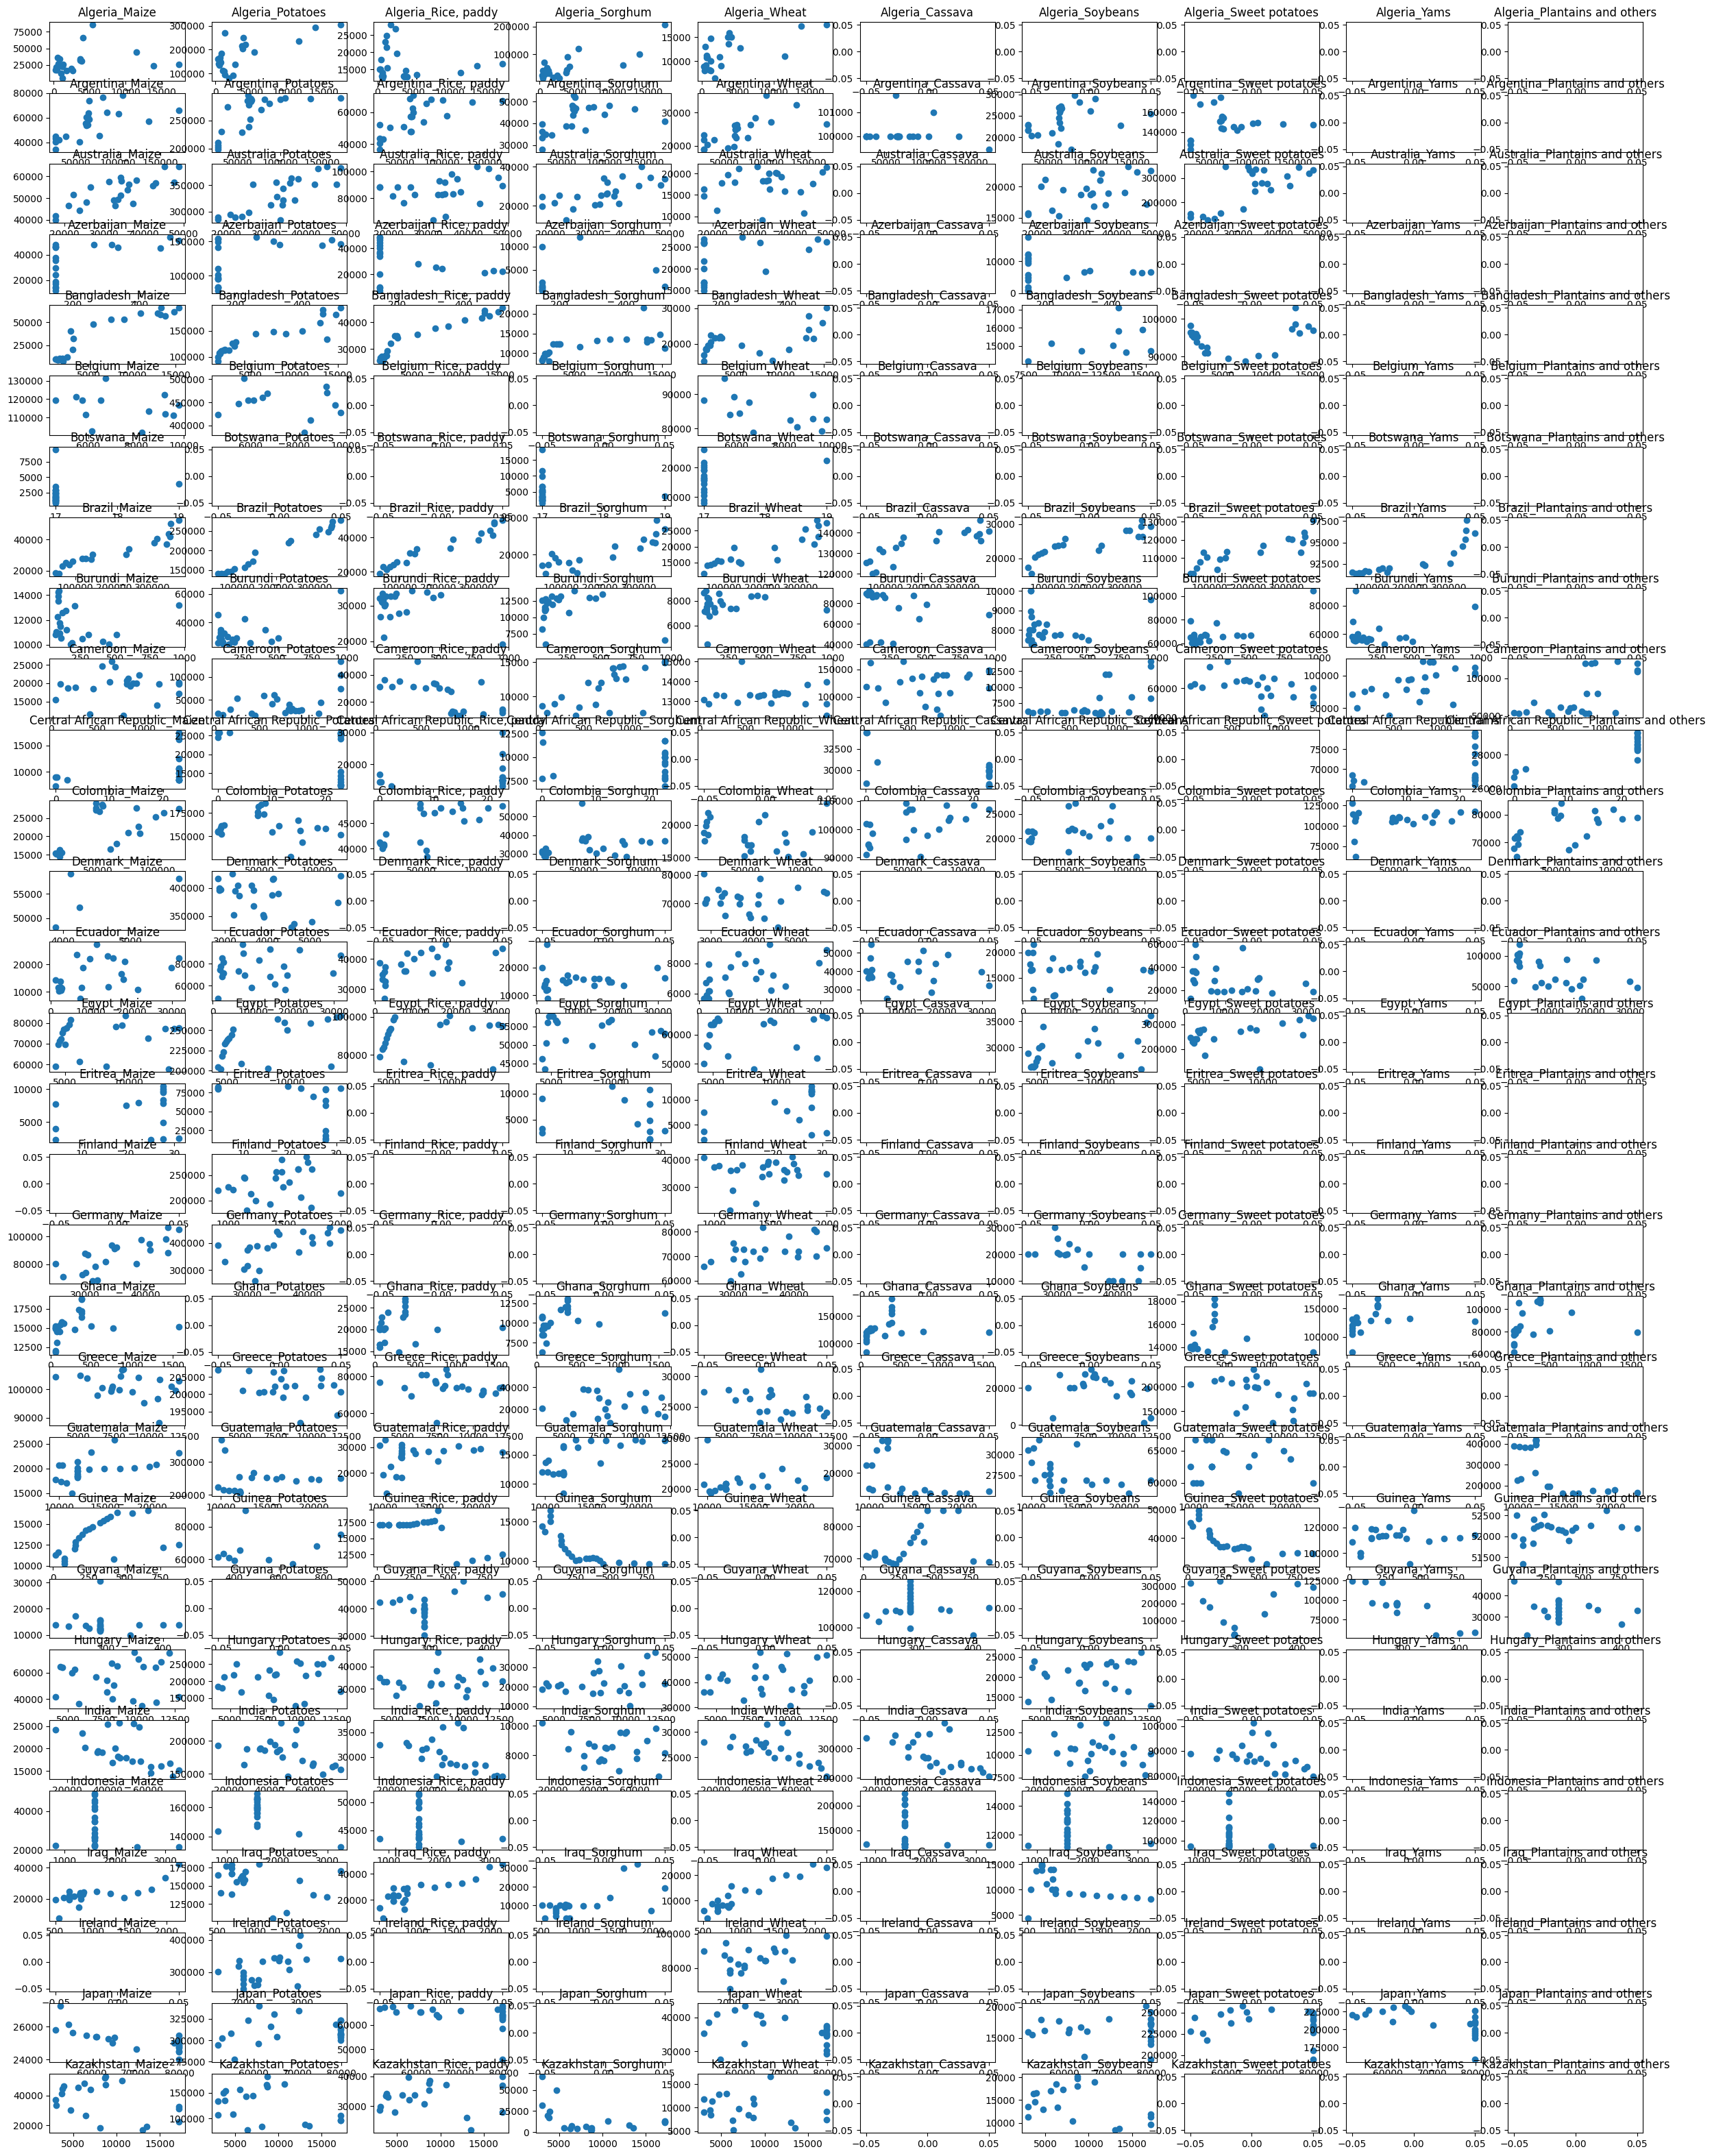

In [65]:
areas=raw_data_cleaned['area'].unique()
crops=raw_data_cleaned['crop'].unique()
fig,ax=plt.subplots(30,10, figsize=(30,40))
i=j=0
for ar in areas:
    j=0
    for cr in crops:
        temp_datacut=raw_data_cleaned.loc[(raw_data_cleaned['area']==ar) & (raw_data_cleaned['crop']==cr)]
        title=ar+'_'+cr
        ax[i,j].scatter(temp_datacut['pesticide_vol'],temp_datacut['tot_yield'])
        ax[i,j].set_title(title)
        if j==9:
            break
        j+=1
    if i==29:
        break    
    i+=1
    
plt.show()

In [83]:
raw_data_cleaned_numeric=raw_data_cleaned.drop(['area','crop'], axis=1)

<Axes: >

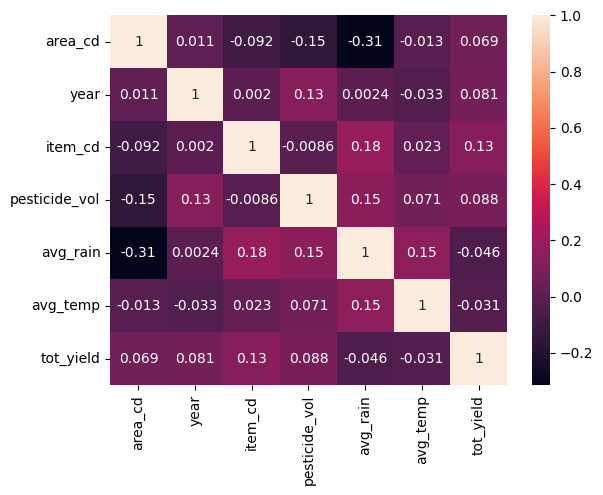

In [85]:
sns.heatmap(raw_data_cleaned_numeric.corr(),annot=True)

In [138]:
raw_data_cleaned_numeric_scaled=raw_data_cleaned_numeric
columns=['pest2','temp2','rain2','pest_rain','pest_temp','rain_temp','pest_rain_temp']
for col in columns:
    scale=MinMaxScaler().fit(raw_data_cleaned_numeric[[col]])
    raw_data_cleaned_numeric_scaled[col]=scale.transform(raw_data_cleaned_numeric[[col]])

In [142]:
raw_data_cleaned_numeric_scaled=raw_data_cleaned_numeric
columns=['area_cd','year','item_cd']
for col in columns:
    scale=MinMaxScaler().fit(raw_data_cleaned_numeric[[col]])
    raw_data_cleaned_numeric_scaled[col]=scale.transform(raw_data_cleaned_numeric[[col]])

In [97]:
raw_data_cleaned_numeric_scaled.head()

area_cd  year  item_cd  pesticide_vol  avg_rain  avg_temp  tot_yield
523        4  1990       56       0.004973  0.011916  0.624443      16500
524        4  1991       56       0.006694  0.011916  0.591031      19231
525        4  1992       56       0.003305  0.011916  0.402138      22828
526        4  1993       56       0.002778  0.011916  0.220077      12500
527        4  1994       56       0.003412  0.011916  0.934660       4512

In [102]:
raw_data_cleaned_numeric_scaled['pest_rain']=raw_data_cleaned_numeric_scaled['pesticide_vol']*raw_data_cleaned_numeric_scaled['avg_rain']
raw_data_cleaned_numeric_scaled['pest_temp']=raw_data_cleaned_numeric_scaled['pesticide_vol']*raw_data_cleaned_numeric_scaled['avg_temp']
raw_data_cleaned_numeric_scaled['rain_temp']=raw_data_cleaned_numeric_scaled['avg_temp']*raw_data_cleaned_numeric_scaled['avg_rain']


<Axes: >

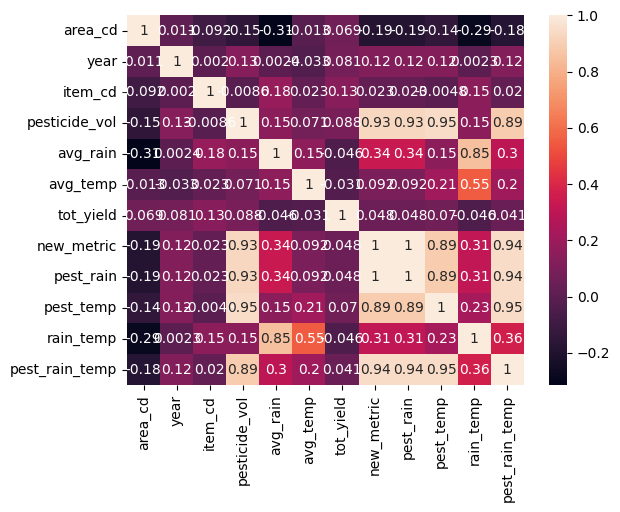

In [104]:
raw_data_cleaned_numeric_scaled['pest_rain_temp']=raw_data_cleaned_numeric_scaled['avg_temp']*raw_data_cleaned_numeric_scaled['avg_rain']*raw_data_cleaned_numeric_scaled['pesticide_vol']


In [121]:
raw_data_cleaned_numeric_scaled['pest2']=raw_data_cleaned_numeric_scaled['pesticide_vol']*raw_data_cleaned_numeric_scaled['pesticide_vol']
raw_data_cleaned_numeric_scaled['temp2']=raw_data_cleaned_numeric_scaled['avg_temp']*raw_data_cleaned_numeric_scaled['avg_temp']
raw_data_cleaned_numeric_scaled['rain2']=raw_data_cleaned_numeric_scaled['avg_rain']*raw_data_cleaned_numeric_scaled['avg_rain']


In [144]:
raw_data_cleaned_numeric_scaled.to_csv('../data/raw_data_upd2.csv')

In [143]:
raw_data_cleaned_numeric_scaled.describe()

area_cd         year      item_cd  pesticide_vol     avg_rain   
count  6597.000000  6597.000000  6597.000000    6597.000000  6597.000000  \
mean      0.394731     0.504959     0.188288       0.054863     0.334841   
std       0.261166     0.307173     0.196971       0.112144     0.246321   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%       0.159363     0.217391     0.025316       0.001404     0.151458   
50%       0.370518     0.478261     0.143460       0.014408     0.221700   
75%       0.581673     0.782609     0.225738       0.071119     0.501725   
max       1.000000     1.000000     1.000000       1.000000     1.000000   

          avg_temp      tot_yield   new_metric    pest_rain    pest_temp   
count  6597.000000    6597.000000  6597.000000  6597.000000  6597.000000  \
mean      0.587058   72298.579354     0.022458     0.041882     0.040163   
std       0.236269   85892.344016     0.061679     0.115026     0.099850   
min       0.000000      50.000000     0.000000     0.000000     0.000000   
25%       0.374814   17467.000000     0.000277     0.000517     0.000986   
50%       0.577666   34775.000000     0.002869     0.005351     0.007603   
75%       0.831601   93985.000000     0.018322     0.034170     0.041782   
max       1.000000  501412.000000     0.536218     1.000000     1.000000   

         rain_temp  pest_rain_temp        pest2        temp2        rain2  
count  6597.000000     6597.000000  6597.000000  6597.000000  6597.000000  
mean      0.228750        0.031903     0.015584     0.400452     0.172784  
std       0.213525        0.101749     0.086002     0.280908     0.226777  
min       0.000000        0.000000     0.000000     0.000000     0.000000  
25%       0.075844        0.000311     0.000002     0.140486     0.022940  
50%       0.159445        0.003256     0.000208     0.333698     0.049151  
75%       0.320945        0.020151     0.005058     0.691560     0.251728  
max       1.000000        1.000000     1.000000     1.000000     1.000000